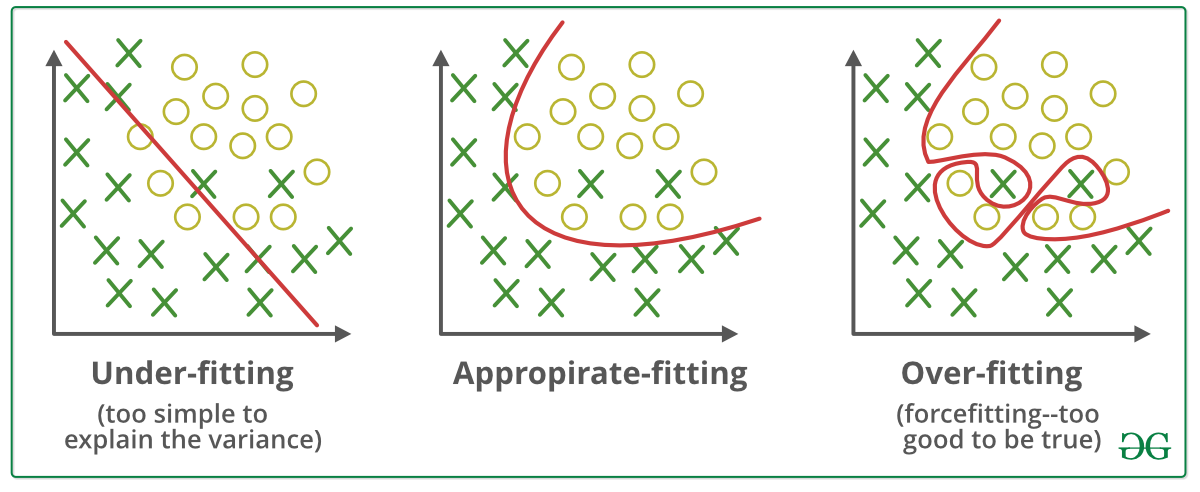


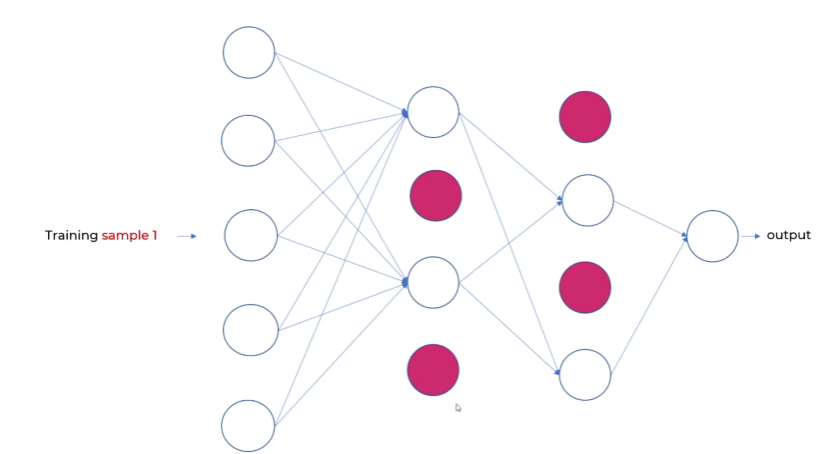


_Dropping random neuron by 50% rate_


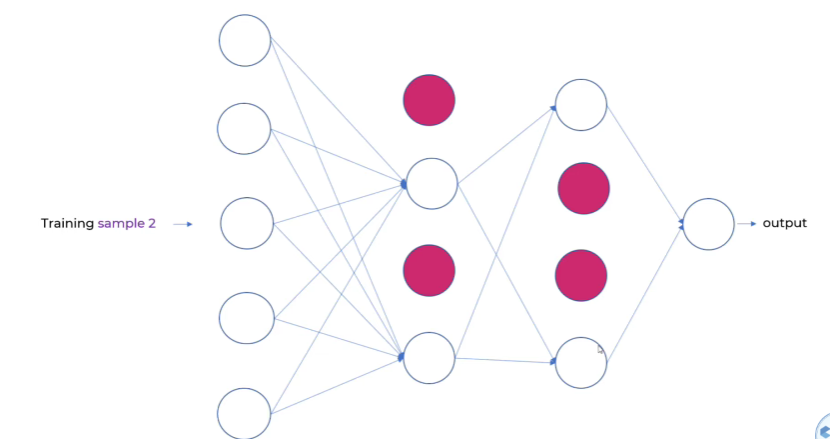


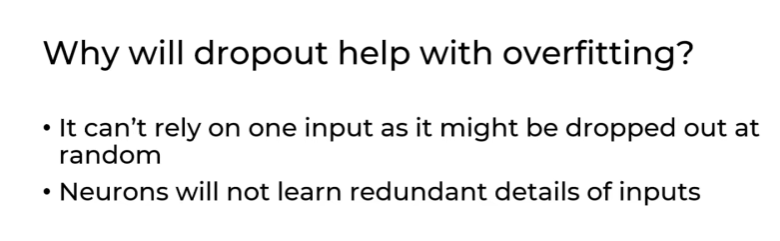

---


## Dropout Regularization In Deep Neural Network

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_csv("./sonar_dataset.csv", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
115,0.0414,0.0436,0.0447,0.0844,0.0419,0.1215,0.2002,0.1516,0.0818,0.1975,...,0.0045,0.0136,0.0113,0.0053,0.0165,0.0141,0.0077,0.0246,0.0198,M
68,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,...,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012,R
194,0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,0.2471,...,0.0083,0.0080,0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014,M
38,0.0123,0.0022,0.0196,0.0206,0.0180,0.0492,0.0033,0.0398,0.0791,0.0475,...,0.0125,0.0134,0.0026,0.0038,0.0018,0.0113,0.0058,0.0047,0.0071,R
142,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208,M


In [4]:
df.shape

(208, 61)

In [5]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [7]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [ ]:
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [ ]:
y = pd.get_dummies(y, drop_first=True)
y.sample(5)

,R
56,True
150,False
20,True
22,True
173,False


In [10]:
y.value_counts()

R    
False    111
True      97
Name: count, dtype: int64

In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [13]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033
179,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0118,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0153,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063


## Using Deep Learning Model

**Model without Dropout Layer**


In [14]:

import tensorflow as tf
from tensorflow import keras

In [15]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15,  activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 4s 10ms/step - loss: 0.6866 - accuracy: 0.5769
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6618 - accuracy: 0.5833
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6370 - accuracy: 0.7179
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5980 - accuracy: 0.7500
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5691 - accuracy: 0.7949
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5222 - accuracy: 0.7692
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4851 - accuracy: 0.8269
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4552 - accuracy: 0.8013
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4243 - accuracy: 0.8013
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4102 - accuracy: 0.8590
Epoch 1

In [16]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 9ms/step - loss: 1.0778 - accuracy: 0.7692


[1.0778028964996338, 0.7692307829856873]

In [17]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 6ms/step
[2.6671930e-06 9.9790227e-01 9.4107878e-01 1.2788984e-04 1.0000000e+00
 9.9986482e-01 6.5696575e-02 1.0000000e+00 8.8789609e-05 1.0000000e+00]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.89      0.80        27
        True       0.84      0.64      0.73        25

    accuracy                           0.77        52
   macro avg       0.78      0.76      0.76        52
weighted avg       0.78      0.77      0.77        52



## Model with Dropout Layer


In [19]:

modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.8350 - accuracy: 0.5192
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.7417 - accuracy: 0.5385
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7201 - accuracy: 0.4936
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7104 - accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7016 - accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.7090 - accuracy: 0.4744
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.4808
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6763 - accuracy: 0.5385
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6676 - accuracy: 0.6026
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7034 - accuracy: 0.4872
Epoch 

In [ ]:
modeld.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4229 - accuracy: 0.8077


[0.4229210317134857, 0.807692289352417]

In [21]:

y_pred = modeld.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 4ms/step
[2.8377899e-05 7.5294948e-01 7.8558260e-01 2.8400701e-03 9.6646893e-01
 8.5730636e-01 3.2665661e-01 9.5955211e-01 1.6086927e-02 9.7834641e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.89      0.83        27
        True       0.86      0.72      0.78        25

    accuracy                           0.81        52
   macro avg       0.82      0.80      0.81        52
weighted avg       0.81      0.81      0.81        52



## You can see that by using dropout layer test accuracy increased from 0.77 to 0.81
